In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
target = pd.read_csv('data/train_target.csv')

In [3]:

plt.style.use('ggplot')


%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('data/train.csv')
target = pd.read_csv('data/train_target.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

(627228, 11)
wagnum               int64
ts_id                int64
milleage_all       float64
axl1_l_w_flange    float64
axl1_r_w_flange    float64
axl2_l_w_flange    float64
axl2_r_w_flange    float64
axl3_l_w_flange    float64
axl3_r_w_flange    float64
axl4_l_w_flange    float64
axl4_r_w_flange    float64
dtype: object
['wagnum' 'ts_id' 'milleage_all' 'axl1_l_w_flange' 'axl1_r_w_flange'
 'axl2_l_w_flange' 'axl2_r_w_flange' 'axl3_l_w_flange' 'axl3_r_w_flange'
 'axl4_l_w_flange' 'axl4_r_w_flange']


<AxesSubplot: >

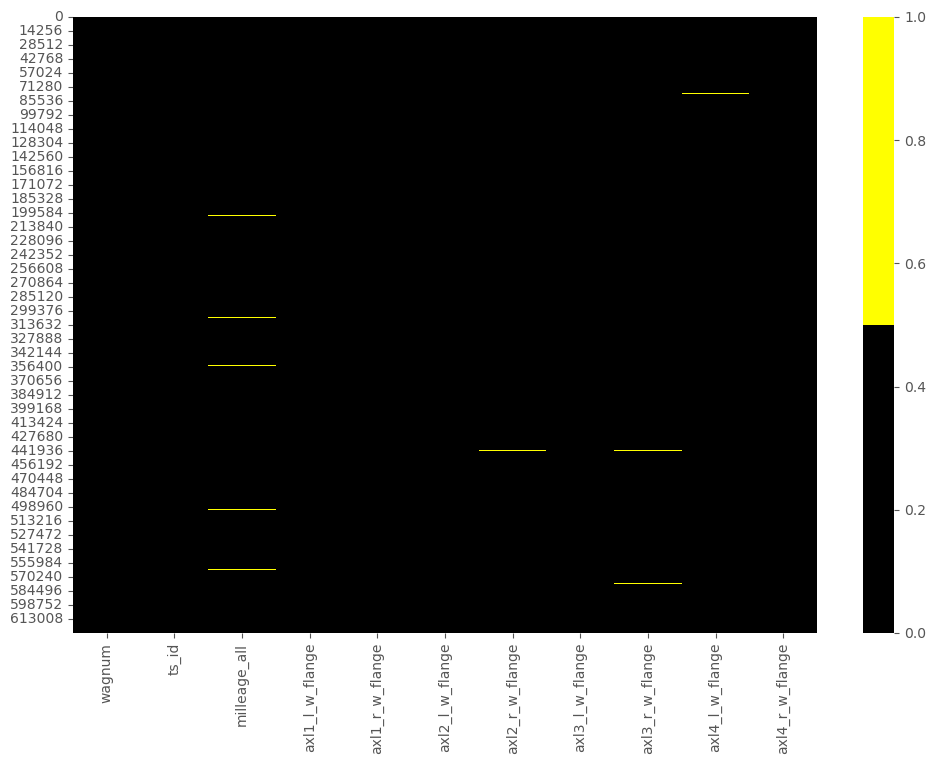

In [6]:
cols = df.columns 

colours = ['#000000', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

wagnum - 0%
ts_id - 0%
milleage_all - 0%
axl1_l_w_flange - 0%
axl1_r_w_flange - 0%
axl2_l_w_flange - 0%
axl2_r_w_flange - 0%
axl3_l_w_flange - 0%
axl3_r_w_flange - 0%
axl4_l_w_flange - 0%
axl4_r_w_flange - 0%


In [8]:
df['mes_id'] = df['wagnum'].apply(str) + '_' + df['ts_id'].apply(str)

In [9]:
# df

In [10]:
target['mes_id'] = target['wagnum'].apply(str) + '_' + target['ts_id'].apply(str)

In [11]:
target

,wagnum,ts_id,target,mes_id
0,2,3,38958.0,2_3
1,3,2,57253.0,3_2
2,5,4,9734.0,5_4
3,6,1,2604.0,6_1
4,8,4,17272.0,8_4
...,...,...,...,...
33007,37430,4,74694.0,37430_4
33008,37431,3,25790.0,37431_3
33009,37432,4,10211.0,37432_4
33010,37433,2,7526.0,37433_2


In [12]:
merged_df = pd.merge(df, target, on='mes_id')

In [13]:
merged_df

,wagnum_x,ts_id_x,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id,wagnum_y,ts_id_y,target
0,2,3,10371.0,28.6,29.7,28.6,28.8,30.4,29.3,29.9,28.3,2_3,2,3,38958.0
1,2,3,29448.0,28.8,29.1,28.0,27.8,30.1,28.9,29.1,27.8,2_3,2,3,38958.0
2,2,3,33963.0,28.6,29.1,28.3,28.5,29.8,29.4,29.7,28.3,2_3,2,3,38958.0
3,2,3,37184.0,29.0,29.7,29.1,29.0,30.0,30.2,29.0,28.0,2_3,2,3,38958.0
4,2,3,37637.0,29.0,29.0,28.5,29.4,30.0,29.9,28.9,28.7,2_3,2,3,38958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627223,37434,1,66338.0,30.2,29.4,26.8,28.9,28.8,29.4,29.3,30.3,37434_1,37434,1,22882.0
627224,37434,1,67618.0,30.4,29.2,26.9,29.0,29.1,29.5,29.9,29.9,37434_1,37434,1,22882.0
627225,37434,1,77566.0,29.9,28.9,27.0,30.0,28.6,29.2,29.9,29.7,37434_1,37434,1,22882.0
627226,37434,1,78849.0,29.8,29.3,27.0,29.2,28.1,28.5,29.6,30.0,37434_1,37434,1,22882.0


In [14]:
merged_df = merged_df.drop(['wagnum_y', 'ts_id_y'], axis=1)

In [15]:
merged_df.columns = ['wagnum', 'ts_id', 'milleage_all', 'axl1_l_w_flange',
       'axl1_r_w_flange', 'axl2_l_w_flange', 'axl2_r_w_flange',
       'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange',
       'axl4_r_w_flange', 'mes_id', 'target']

In [16]:
# merged_df.to_csv('train_with_target.csv', index=False)

In [17]:
merged_df = pd.read_csv('data/train_with_target.csv')

<AxesSubplot: >

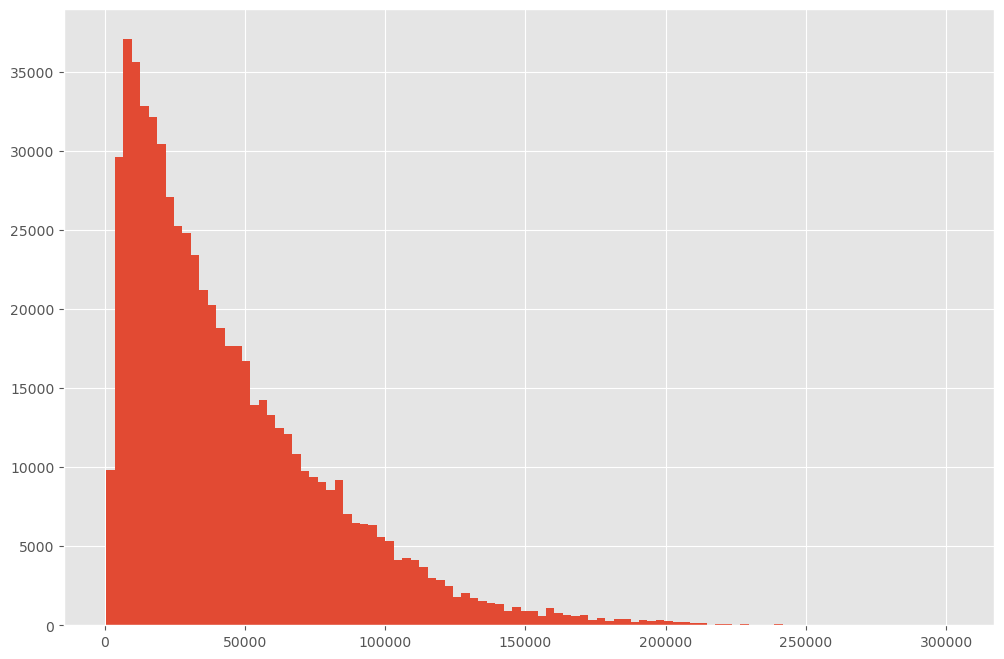

In [18]:
merged_df['target'].hist(bins=100)

In [19]:
merged_df = merged_df.sort_values(by='target')
merged_df.head()

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id,target
622844,37156,2,109038.0,30.3,27.5,28.3,30.7,27.5,29.9,30.4,29.8,37156_2,611.0
622841,37156,2,103366.0,30.5,28.5,29.4,30.6,28.0,31.2,30.6,30.9,37156_2,611.0
622840,37156,2,103366.0,30.4,27.8,29.5,30.9,28.5,30.2,31.0,30.2,37156_2,611.0
622839,37156,2,102246.0,30.4,28.2,29.3,30.6,28.1,30.4,31.0,30.4,37156_2,611.0
622842,37156,2,106810.0,30.2,27.5,29.2,30.5,28.2,29.5,29.9,30.3,37156_2,611.0


In [20]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


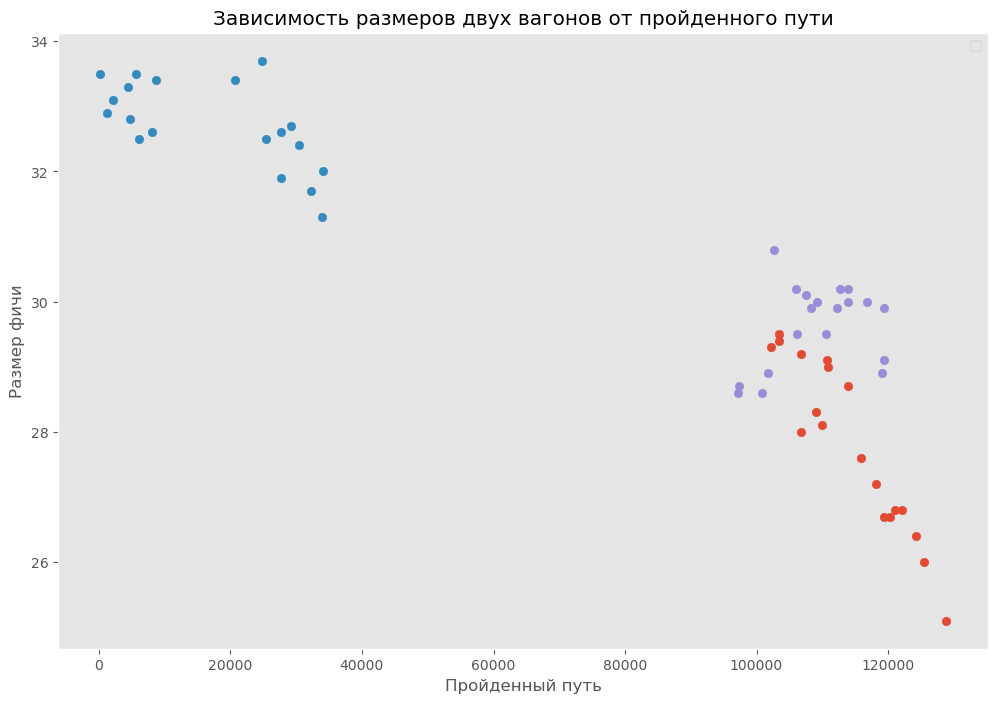

In [21]:
#for m in measures:
m = "axl2_l_w_flange"
plt.scatter(merged_df[merged_df['mes_id']=="37156_2"]['milleage_all'], merged_df[merged_df['mes_id']=="37156_2"][m])#, color='C0')#,label = f'Вагон А{m}')
plt.scatter(merged_df[merged_df['mes_id']=="25397_2"]['milleage_all'], merged_df[merged_df['mes_id']=="25397_2"][m])#, color='C0')#,label = f'Вагон А{m}')
plt.scatter(merged_df[merged_df['mes_id']=="13609_5"]['milleage_all'], merged_df[merged_df['mes_id']=="13609_5"][m])#, color='C0')#,label = f'Вагон А{m}')

#    plt.plot(merged_df[merged_df['mes_id']==w1]['milleage_all'], merged_df[merged_df['mes_id']==w1][m], color='C1')#,label = f'Вагон Б{m}')
plt.xlabel("Пройденный путь")
plt.ylabel("Размер фичи")
plt.title("Зависимость размеров двух вагонов от пройденного пути")
plt.grid()
plt.legend()

## Решение №1. 
### Для каждого вагона сделаем фичи: угол наклона прямой тенденции изменения размера текущей фичи и ее сдвиг. Т.е обучаем линейную регрессию берем из нее коэфициенты и записываем таблицу.

In [22]:
merged_df = pd.read_csv('data/train_with_target.csv')
merged_df

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id,target
0,2,3,10371.0,28.6,29.7,28.6,28.8,30.4,29.3,29.9,28.3,2_3,38958.0
1,2,3,29448.0,28.8,29.1,28.0,27.8,30.1,28.9,29.1,27.8,2_3,38958.0
2,2,3,33963.0,28.6,29.1,28.3,28.5,29.8,29.4,29.7,28.3,2_3,38958.0
3,2,3,37184.0,29.0,29.7,29.1,29.0,30.0,30.2,29.0,28.0,2_3,38958.0
4,2,3,37637.0,29.0,29.0,28.5,29.4,30.0,29.9,28.9,28.7,2_3,38958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627223,37434,1,66338.0,30.2,29.4,26.8,28.9,28.8,29.4,29.3,30.3,37434_1,22882.0
627224,37434,1,67618.0,30.4,29.2,26.9,29.0,29.1,29.5,29.9,29.9,37434_1,22882.0
627225,37434,1,77566.0,29.9,28.9,27.0,30.0,28.6,29.2,29.9,29.7,37434_1,22882.0
627226,37434,1,78849.0,29.8,29.3,27.0,29.2,28.1,28.5,29.6,30.0,37434_1,22882.0


In [23]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']

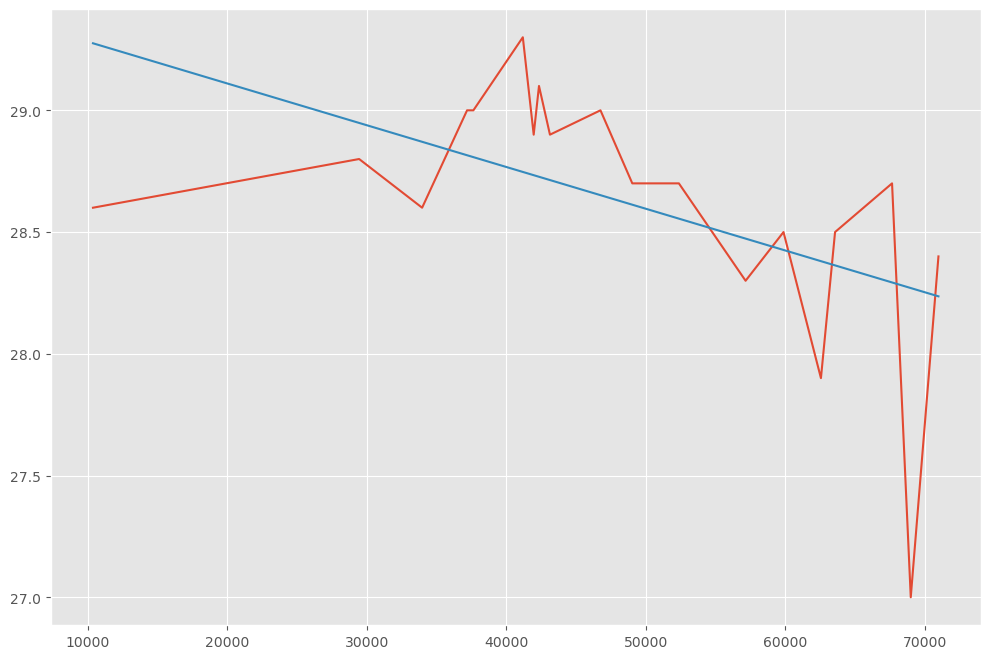

In [24]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
x = merged_df[merged_df['mes_id'] == '2_3']["milleage_all"].to_numpy().reshape(-1,1)
y = merged_df[merged_df['mes_id'] == '2_3']["axl1_l_w_flange"]
lg.fit(x,y)
a = lg.coef_#.predict(x[0,:])#,lg.predict(x[-1])
b = lg.intercept_
plt.plot(x,y,x,x*a+b)

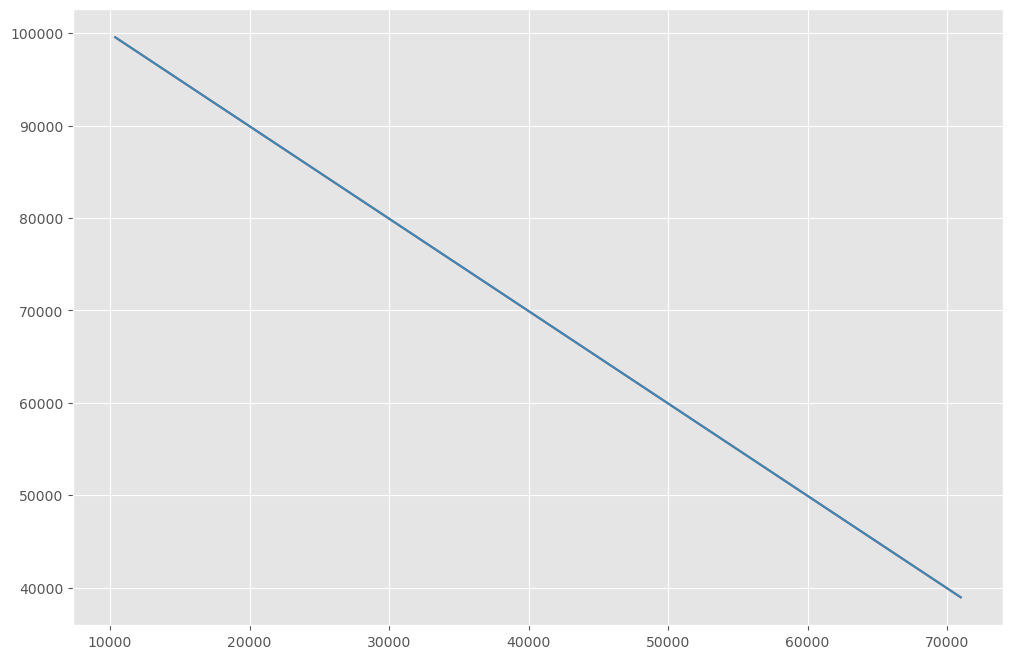

In [25]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
x = merged_df[merged_df['mes_id'] == '2_3']["milleage_all"].to_numpy().reshape(-1,1)
y = merged_df[merged_df['mes_id'] == '2_3']["target"].to_numpy().reshape(-1,1)
y = np.max(x) - x + y
lg.fit(x,y)
a = lg.coef_#.predict(x[0,:])#,lg.predict(x[-1])
b = lg.intercept_
plt.plot(x,y,x,x*a+b);

In [26]:
merged_df[merged_df['mes_id'] == '2_3']["milleage_all"]

0     10371.0
1     29448.0
2     33963.0
3     37184.0
4     37637.0
5     41181.0
6     41960.0
7     42340.0
8     43126.0
9     46747.0
10    49028.0
11    52367.0
12    57149.0
13    59867.0
14    62550.0
15    63562.0
16    67647.0
17    68988.0
18    70973.0
Name: milleage_all, dtype: float64

In [27]:
import tqdm

In [28]:



%%time
lin_regr_dict = {}
lin_regr_dict["mes_id"] = []
lin_regr_dict["target"] = []
lin_regr_dict["wagnum"] = []
lin_regr_dict["ts_id"] = []
lin_regr_dict["milleage_all"] = []

for i in measures:
    lin_regr_dict[i+"_"+"a"] = []
    lin_regr_dict[i+"_"+"b"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict["mes_id"].append(m_id)
    lin_regr_dict["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())
    lin_regr_dict["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())

    for m in measures:
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))

            
        a = lg.coef_
        b = lg.intercept_
        lin_regr_dict[m+"_"+"a"].append(float(a))
        lin_regr_dict[m+"_"+"b"].append(float(b))

  0%|                                                                             | 6/33012 [00:09<15:00:16,  1.64s/it]


KeyboardInterrupt: 

In [29]:
lin_regr_df = pd.DataFrame(lin_regr_dict)
lin_regr_df

ValueError: All arrays must be of the same length

In [ ]:
lin_regr_df.to_csv('data/lin_regr_df.csv', index=False)

In [ ]:
#Пробую тоже самое для таргета

lin_regr_dict_t = {}
lin_regr_dict_t["mes_id"] = []
lin_regr_dict_t["target"] = []
lin_regr_dict_t["wagnum"] = []
lin_regr_dict_t["ts_id"] = []
lin_regr_dict_t["milleage_all"] = []

#for i in measures:
lin_regr_dict_t["target_div_all"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict_t["mes_id"].append(m_id)
    lin_regr_dict_t["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())#max используется из-за того,что там все значения одинаковые, соот-но можно брать любое значение
    lin_regr_dict_t["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict_t["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict_t["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())
    if len(np.unique(merged_df[merged_df["mes_id"] ==m_id]["target"])) != 1:
        print(np.unique(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"]))
    for m in measures:
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))


        a = lg.coef_
        b = lg.intercept_
        lin_regr_dict_t[m+"_"+"a"].append(float(a))
        lin_regr_dict_t[m+"_"+"b"].append(float(b))


In [ ]:
for m in measures:
    ar = []
    eps = 2

    for index,row in tqdm.tqdm(lin_regr_df.iterrows()):
        #print(row["mes_id"])
        av_target = 0
        current_m_value = row[m]
        mask = (current_m_value-eps<lin_regr_df[m])&(lin_regr_df[m]<current_m_value+eps)
        common_values = lin_regr_df[mask][m]
        ar.append(common_values.mean())
    lin_regr_df["av_target_for_"+m] = ar

In [ ]:
# lin_regr_df.to_csv("lin_regr_df_upd_with_mean_target_feature.csv",index = False)

In [30]:
lin_regr_df = pd.read_csv('data/lin_regr_df_upd_with_mean_target_feature.csv')

In [31]:
lin_regr_df.columns

Index(['mes_id', 'target', 'wagnum', 'ts_id', 'milleage_all',
       'axl1_l_w_flange_a', 'axl1_l_w_flange_b', 'axl1_r_w_flange_a',
       'axl1_r_w_flange_b', 'axl2_l_w_flange_a', 'axl2_l_w_flange_b',
       'axl2_r_w_flange_a', 'axl2_r_w_flange_b', 'axl3_l_w_flange_a',
       'axl3_l_w_flange_b', 'axl3_r_w_flange_a', 'axl3_r_w_flange_b',
       'axl4_l_w_flange_a', 'axl4_l_w_flange_b', 'axl4_r_w_flange_a',
       'axl4_r_w_flange_b', 'axl1_l_w_flange', 'axl1_r_w_flange',
       'axl2_l_w_flange', 'axl2_r_w_flange', 'axl3_l_w_flange',
       'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange',
       'av_target_for_axl3_l_w_flange', 'av_target_for_axl1_l_w_flange',
       'av_target_for_axl1_r_w_flange', 'av_target_for_axl2_l_w_flange',
       'av_target_for_axl2_r_w_flange', 'av_target_for_axl3_r_w_flange',
       'av_target_for_axl4_l_w_flange', 'av_target_for_axl4_r_w_flange'],
      dtype='object')

In [32]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']
for m in measures:
    lin_regr_df[m] = lin_regr_df["milleage_all"] *lin_regr_df[m+"_a"]+lin_regr_df[m+"_b"]
# for i in #lin_regr_df.iterrows():
#     print(i)

<AxesSubplot: >

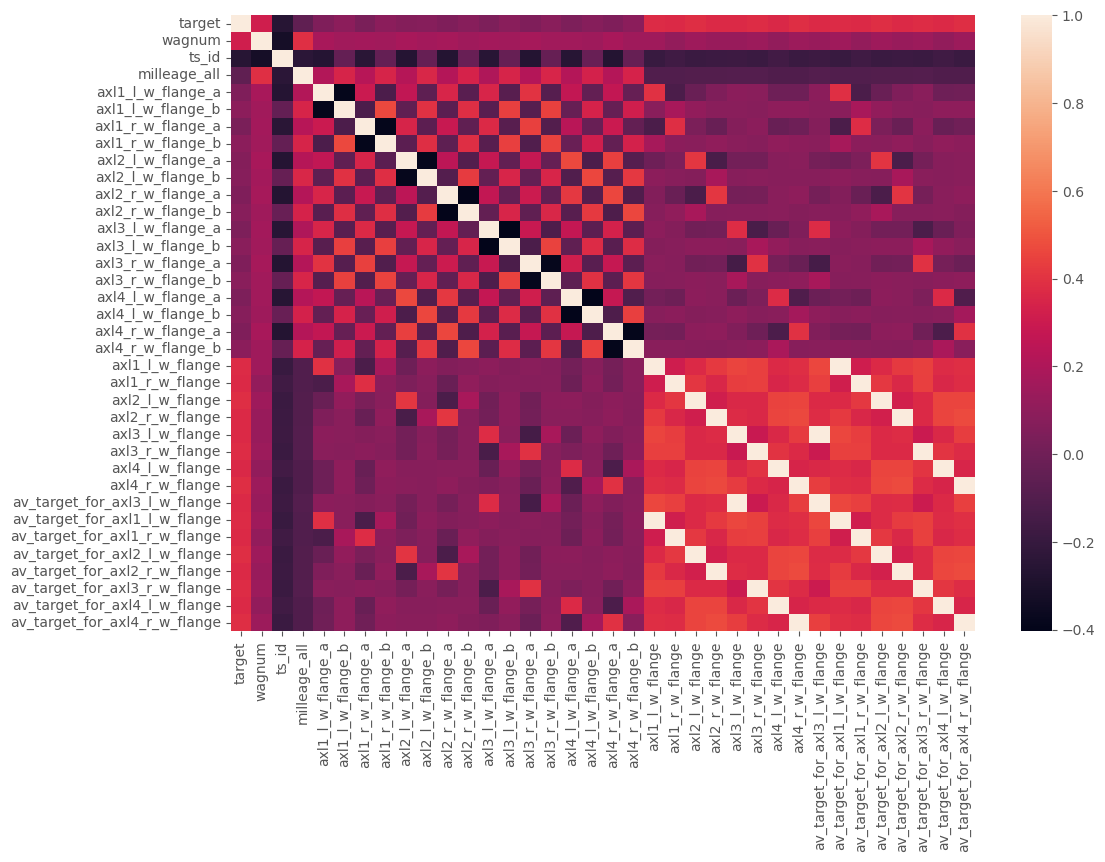

In [33]:
import seaborn as sns
sns.heatmap(lin_regr_df.drop(columns=["mes_id"]).corr())

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Дописать Стандарт Скалер
#scaler = StandardScaler()

y = lin_regr_df["target"]
x = lin_regr_df.drop(columns=["target","mes_id","wagnum"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
%%time
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 5,#5
    "eval_metric":'mae'
}
model = xgb.XGBRegressor( **params)#xgb.XGBRegressor(**params )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
#model = xgb.XGBRegressor( )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


CPU times: total: 38 s
Wall time: 5.57 s


17623.639100120552

<AxesSubplot: >

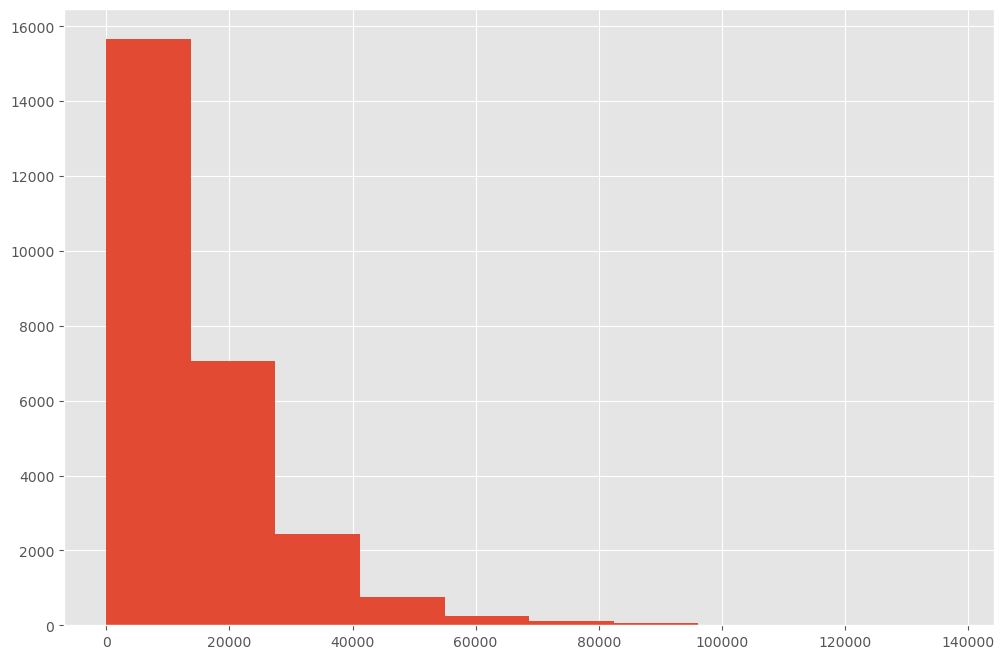

In [36]:
y_train_pred = model.predict(x_train)
error = np.abs(y_train_pred - y_train)
error.hist()

In [37]:
mask = error<30000
model = xgb.XGBRegressor(**params)#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train[mask],y_train[mask])

y_pred = model.predict(x_test)
y_pred[y_pred<600] = 5000
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


17101.039428184056

In [38]:
np.mean(y_pred), np.mean(y_test), np.mean(y_train)

(41397.844, 43642.77116462214, 44781.20144647658)

In [39]:
max(y_train), max(y_test), max(y_pred)

(301983, 256569, 151180.73)

In [40]:
y_pred1 = np.array(y_pred)
y_test1 = np.array(y_test)

for i in range(len(y_pred1)):
    print(y_pred1[i],y_test1[i])

38001.7 18311
24604.67 8114
16163.06 4890
24128.293 22181
74282.76 72370
21725.738 23371
39842.18 24191
31140.455 34925
29340.7 9995
88118.28 83700
44894.97 83964
48349.133 56963
15532.352 16866
26967.832 67071
116824.41 117372
25890.209 7601
40211.46 20310
35731.47 4861
41305.367 59159
27096.217 25260
28762.982 26948
38706.04 21238
25687.28 12089
14841.382 96056
21149.646 51518
19349.344 17697
22570.63 4542
55904.082 15571
21796.031 24465
56550.344 68503
25015.354 14583
7667.2812 13742
38201.07 71257
28929.834 46464
57552.004 117743
34100.848 54450
112682.055 79000
20995.082 24860
4859.793 9179
25769.06 40507
65227.797 70014
43345.92 60240
17702.152 28016
42313.656 15845
18435.92 18300
4690.2476 7504
56794.617 24241
55399.2 24116
114603.83 128218
11996.617 14225
22191.68 29815
57665.914 81948
41114.098 24669
28859.865 13795
61675.0 90338
151180.73 146348
33461.92 44155
29207.541 51129
66993.766 109180
51044.754 68013
7906.278 24741
15309.51 19713
43621.984 21007
28736.492 65116
35073.

In [41]:
test_df = pd.read_parquet("./data/test.parquet")
test_df["mes_id"] = test_df["wagnum"].astype(str) + "_" + test_df["ts_id"].astype(str)
test_df

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id
0,0,1,258.0,30.6,29.2,29.7,30.2,29.4,29.1,28.2,29.5,0_1
1,0,1,2905.0,30.0,28.2,29.2,29.2,28.7,28.9,28.1,29.0,0_1
2,0,1,3885.0,29.8,28.6,29.3,29.1,28.5,28.7,27.9,28.6,0_1
3,0,1,4864.0,29.7,28.4,29.3,29.1,29.1,28.5,28.2,29.0,0_1
4,0,1,6225.0,30.6,29.1,29.4,29.2,29.1,28.7,27.9,28.3,0_1
...,...,...,...,...,...,...,...,...,...,...,...,...
209071,37429,4,32362.0,28.2,29.4,31.3,32.2,29.0,27.8,29.1,29.4,37429_4
209072,37429,4,34150.0,28.4,29.4,31.4,32.1,28.8,27.6,29.3,28.9,37429_4
209073,37429,4,34150.0,28.6,29.0,30.8,32.7,28.8,27.7,29.2,28.3,37429_4
209074,37429,4,35942.0,27.9,28.7,31.0,32.1,28.0,27.3,29.1,27.7,37429_4


In [42]:
test_df.to_csv("test.csv",index = False)

In [43]:
%%time
import tqdm
#То, что закомментировано удалять не нужно. Я закомментил, чтобы файлы не перезаписывались

merged_df = test_df
lin_regr_dict = {}
lin_regr_dict["mes_id"] = []
#lin_regr_dict["target"] = []
lin_regr_dict["wagnum"] = []
lin_regr_dict["ts_id"] = []
lin_regr_dict["milleage_all"] = []

for i in measures:
    lin_regr_dict[i+"_"+"a"] = []
    lin_regr_dict[i+"_"+"b"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict["mes_id"].append(m_id)
    #lin_regr_dict["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())#max используется из-за того,что там все значения одинаковые, соот-но можно брать любое значение
    lin_regr_dict["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())

    for m in measures:
        
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        #print(1)
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        #print(2)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))
       # print(3)
            
        a = lg.coef_
        b = lg.intercept_
        #print(4)
        lin_regr_dict[m+"_"+"a"].append(float(a))
        lin_regr_dict[m+"_"+"b"].append(float(b))
print(5)
lin_regr_df = pd.DataFrame(lin_regr_dict)

  1%|▍                                                                            | 61/11004 [00:28<1:26:28,  2.11it/s]


KeyboardInterrupt: 

In [44]:
lin_regr_df

,mes_id,target,wagnum,ts_id,milleage_all,axl1_l_w_flange_a,axl1_l_w_flange_b,axl1_r_w_flange_a,axl1_r_w_flange_b,axl2_l_w_flange_a,...,axl4_l_w_flange,axl4_r_w_flange,av_target_for_axl3_l_w_flange,av_target_for_axl1_l_w_flange,av_target_for_axl1_r_w_flange,av_target_for_axl2_l_w_flange,av_target_for_axl2_r_w_flange,av_target_for_axl3_r_w_flange,av_target_for_axl4_l_w_flange,av_target_for_axl4_r_w_flange
0,2_3,38958,2,3,70973,-0.000017,29.453223,-0.000031,30.351132,-0.000013,...,29.669658,27.383199,29.038631,28.466283,28.397761,28.335057,28.588561,29.154741,29.475936,27.960507
1,3_2,57253,3,2,37066,-0.000128,32.229261,-0.000010,32.051039,-0.000058,...,31.040181,29.527529,28.015290,27.978337,30.894104,30.255529,31.106258,30.735194,30.529398,29.389137
2,5_4,9734,5,4,48164,-0.000036,29.837873,-0.000016,28.324214,-0.000062,...,27.675823,26.786237,28.302675,28.365285,28.007998,27.686197,26.523313,28.741069,28.131020,27.578913
3,6_1,2604,6,1,30111,-0.000016,30.230283,-0.000175,31.103367,-0.000089,...,30.216163,26.954554,30.084697,29.563164,26.878089,27.671123,28.933900,28.530792,29.902380,27.687301
4,8_4,17272,8,4,20129,-0.000055,32.829162,-0.000028,33.070860,-0.000070,...,30.996031,30.296298,31.224566,30.987618,31.414012,31.061058,27.618413,31.492065,30.498474,30.016388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33007,37430_4,74694,37430,4,28424,-0.000013,32.058386,-0.000077,32.079323,-0.000044,...,31.198709,31.946354,30.992274,30.964285,29.641747,30.447228,31.054459,30.150184,30.635406,31.170540
33008,37431_3,25790,37431,3,51074,-0.000050,30.246305,-0.000060,29.834247,-0.000042,...,25.578247,25.898656,27.049131,28.124817,27.528853,27.087659,29.171300,27.808632,26.703971,26.954644
33009,37432_4,10211,37432,4,58962,-0.000022,28.418829,-0.000010,29.359589,-0.000001,...,25.967678,26.264408,26.887021,27.765450,28.807240,28.369495,28.364887,29.535138,26.996744,27.221108
33010,37433_2,7526,37433,2,50678,-0.000034,29.890199,-0.000024,31.920429,-0.000049,...,28.431798,28.368608,26.359129,28.416326,30.230931,28.172354,27.903537,28.371903,28.615881,28.581916


In [45]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']
for m in measures:
    lin_regr_df[m] = lin_regr_df["milleage_all"] *lin_regr_df[m+"_a"]+lin_regr_df[m+"_b"]

In [46]:
lin_regr_df.to_csv("test_linregr.csv",index = False)

In [47]:
for m in measures:
    ar = []
    eps = 2

    for index,row in tqdm.tqdm(lin_regr_df.iterrows()):
        #print(row["mes_id"])
        av_target = 0
        current_m_value = row[m]
        mask = (current_m_value-eps<lin_regr_df[m])&(lin_regr_df[m]<current_m_value+eps)
        common_values = lin_regr_df[mask][m]
        ar.append(common_values.mean())
    lin_regr_df["av_target_for_"+m] = ar
        #print(ar)
        #break
        #ar.append()
    #lin_regr_df["av_target_for_"+m] = lin

580it [00:07, 81.33it/s]


KeyboardInterrupt: 

In [ ]:
lin_regr_df.to_csv("data/test_linregr_upd_with_av_target_feature.csv",index = False)

In [48]:
%%time
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 5,#5
    "eval_metric":'mae'
}
model = xgb.XGBRegressor( **params)#xgb.XGBRegressor(**params )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
#model = xgb.XGBRegressor( )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


CPU times: total: 37.8 s
Wall time: 4.84 s


17623.639100120552

<AxesSubplot: >

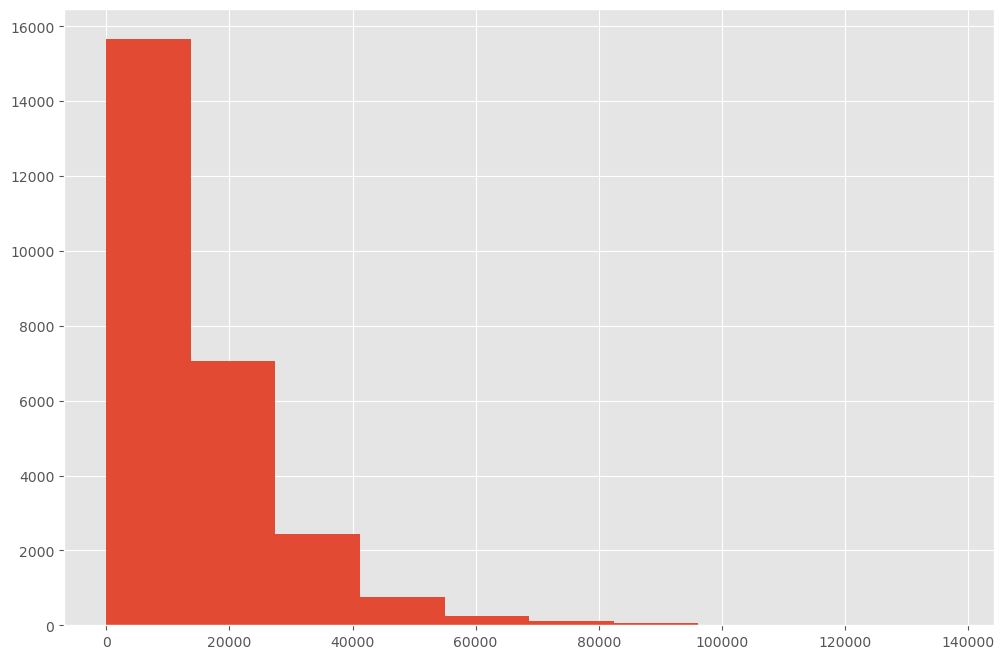

In [49]:
y_train_pred = model.predict(x_train)
error = np.abs(y_train_pred - y_train)
error.hist()

In [50]:
mask = error<30000
model = xgb.XGBRegressor(**params)#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train[mask],y_train[mask])

y_pred = model.predict(x_test)
y_pred[y_pred<600] = 5000
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


17101.039428184056

In [51]:
lin_regr_df = pd.read_csv("data/test_linregr_upd_with_av_target_feature.csv")

In [52]:
need_order = list(model.feature_names_in_)

['ts_id',
 'milleage_all',
 'axl1_l_w_flange_a',
 'axl1_l_w_flange_b',
 'axl1_r_w_flange_a',
 'axl1_r_w_flange_b',
 'axl2_l_w_flange_a',
 'axl2_l_w_flange_b',
 'axl2_r_w_flange_a',
 'axl2_r_w_flange_b',
 'axl3_l_w_flange_a',
 'axl3_l_w_flange_b',
 'axl3_r_w_flange_a',
 'axl3_r_w_flange_b',
 'axl4_l_w_flange_a',
 'axl4_l_w_flange_b',
 'axl4_r_w_flange_a',
 'axl4_r_w_flange_b',
 'axl1_l_w_flange',
 'axl1_r_w_flange',
 'axl2_l_w_flange',
 'axl2_r_w_flange',
 'axl3_l_w_flange',
 'axl3_r_w_flange',
 'axl4_l_w_flange',
 'axl4_r_w_flange',
 'av_target_for_axl3_l_w_flange',
 'av_target_for_axl1_l_w_flange',
 'av_target_for_axl1_r_w_flange',
 'av_target_for_axl2_l_w_flange',
 'av_target_for_axl2_r_w_flange',
 'av_target_for_axl3_r_w_flange',
 'av_target_for_axl4_l_w_flange',
 'av_target_for_axl4_r_w_flange']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#test_subm_y = lin_regr_df["target"]
test_subm_x = lin_regr_df.drop(columns=["mes_id","wagnum"])
test_subm_x = test_subm_x[need_order]

In [54]:
lin_regr_df["target"] = model.predict(test_subm_x)

In [55]:
lin_regr_df

,mes_id,wagnum,ts_id,milleage_all,axl1_l_w_flange_a,axl1_l_w_flange_b,axl1_r_w_flange_a,axl1_r_w_flange_b,axl2_l_w_flange_a,axl2_l_w_flange_b,...,axl4_r_w_flange,av_target_for_axl1_l_w_flange,av_target_for_axl1_r_w_flange,av_target_for_axl2_l_w_flange,av_target_for_axl2_r_w_flange,av_target_for_axl3_l_w_flange,av_target_for_axl3_r_w_flange,av_target_for_axl4_l_w_flange,av_target_for_axl4_r_w_flange,target
0,0_1,0,1,28043,-0.000011,30.256912,-9.200000e-06,28.743071,-0.000083,29.702233,...,26.892865,29.723696,28.643599,27.915734,28.038015,28.499318,28.482027,27.221635,27.631027,36630.304688
1,1_2,1,2,93796,0.000017,27.246124,2.030000e-05,26.783679,-0.000019,30.462743,...,30.714900,28.856999,28.786369,28.758799,28.204273,29.261178,28.334390,30.614583,30.337481,48705.140625
2,4_1,4,1,27869,-0.000015,29.566115,-9.700000e-06,28.847160,-0.000037,31.329451,...,29.046667,29.097510,28.705523,29.957714,27.998151,28.744680,28.440662,26.860064,29.018421,22352.044922
3,7_1,7,1,25274,-0.000040,27.909147,-4.940000e-05,28.869993,-0.000019,29.640379,...,28.983209,27.640025,28.074146,29.099295,28.408072,28.069781,28.199883,29.016424,28.976228,44820.015625
4,13_5,13,5,32750,-0.000032,30.063984,-6.310000e-05,28.761235,-0.000022,30.959190,...,30.087673,28.982984,27.497387,29.930463,27.338228,28.401365,28.322473,26.926700,29.834191,23077.496094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,37418_3,37418,3,35199,-0.000035,29.887820,-3.660000e-05,31.503182,-0.000104,30.199777,...,30.553027,28.750327,29.892739,27.359950,29.410749,29.915876,28.682495,27.698134,30.207852,27691.837891
11000,37419_2,37419,2,84312,-0.000001,31.859339,-2.660000e-05,32.856648,-0.000025,31.150722,...,31.285419,31.009832,30.200682,28.991850,31.161283,30.550690,29.856922,29.202171,30.754828,58433.613281
11001,37426_1,37426,1,116127,-0.000013,28.635922,3.830000e-07,27.809293,-0.000013,31.583354,...,29.303220,27.813592,28.218210,29.754595,30.692262,28.100543,28.102201,30.546081,29.197112,45440.261719
11002,37428_3,37428,3,31765,-0.000091,32.157952,-2.640000e-05,32.256631,-0.000037,30.334138,...,30.501821,29.191332,30.752024,29.106431,28.307577,27.769752,29.056568,29.969896,30.167691,52857.535156


In [ ]:
lin_regr_df.loc[:,["wagnum","ts_id","target"]].to_csv("ML ботать нельзя спать.csv")